In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

import pandas as pd
import graphviz

## Part 3 - training the model

In [71]:
# loading in the data from part 2 - ready to work with
df = pd.read_csv("../data/ready.csv")

In [72]:
df.head(10)

,num_vehicles,casualty_age,is_male,is_serious,hour,is_dry,road_class_is_unclassified,road_class_is_a(m),road_class_is_motorway,road_class_is_a,...,casualty_class_is_driver/rider,casualty_class_is_passenger,casualty_class_is_pedestrian,weekday_string_is_sat,weekday_string_is_wed,weekday_string_is_tue,weekday_string_is_sun,weekday_string_is_thu,weekday_string_is_mon,weekday_string_is_fri
0,2,30,1,0,23,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,2,20,0,0,23,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,29,1,0,6,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,4,17,1,0,6,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,53,1,0,6,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5,1,39,1,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
6,2,60,1,1,2,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7,2,41,1,1,2,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
8,1,18,1,0,21,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
9,2,31,1,0,21,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Part 3a - getting the DataFrame into X matrix and y vector form

In [83]:
# we want to now leave the pandas DataFrame format and get a matrix of features (X) and labels vector (y)

y = list(df.is_serious.values)

withoutY = df.drop(columns = ['is_serious'])
xColumns = withoutY.columns

X = withoutY.as_matrix(xColumns)

# hint: explore the DataFrame API and see if there's anything there that could make life easier...
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

### Part 3b - creating a train/test split

In [100]:
# we want to separate this data into a bulk for training and a 'hold-out' set for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("The training set has {} rows".format(len(X_train)))
print("The test set has {} rows".format(len(X_test)))

# hint: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

The training set has 15106 rows
The test set has 3777 rows


### Part 3c - initialise classifier and train

In [98]:
# let's start by not setting any parameters on our model, and fit to our training data
dtc = skl.tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Part 4 - visualising the model

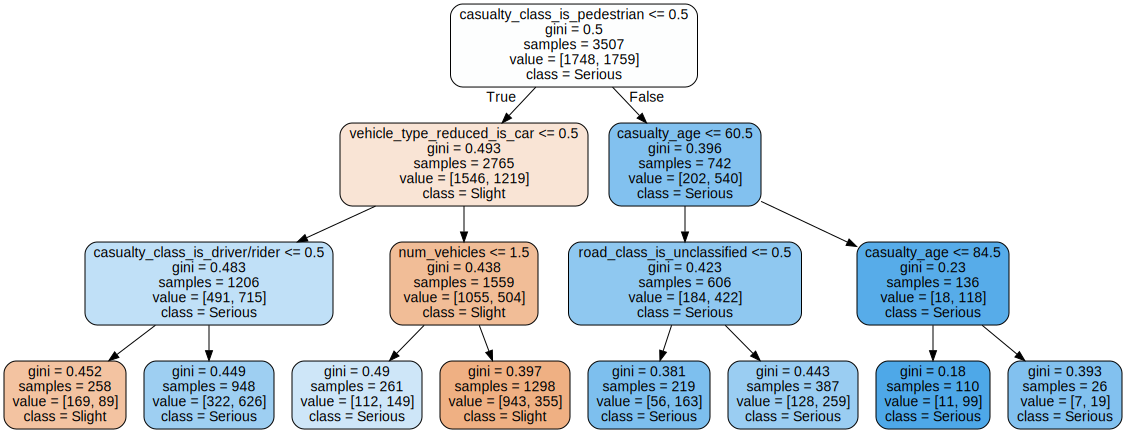

In [77]:
# use graphviz to visualize the model
# try changing the model parameters (eg. max_depth) above and see how it affects the tree!

tree = export_graphviz(dtc, out_file=None, 
                       feature_names=xColumns, 
                       class_names=['Slight', 'Serious'], 
                       filled=True, 
                       rounded=True
                      )

graphviz.Source(tree)

## Part 5 - evaluating the model

In [99]:
# we want to get the predictions the model makes on the test data and compare that to our true labels

true_labels = y_test # do we have this from earlier?
predicted_labels = dtc.predict(X_test)

In [90]:
# first let's try to build our own confusion matrix
# we want to iterate through the true and predicted labels, comparing values

TP = FP = FN = TN = 0

true_pred_pairs = zip(true_labels, predicted_labels)

for (true, pred) in true_pred_pairs:
    if true == 0 and pred == 0:
        TN += 1
    elif true == 0 and pred == 1:
        FP += 1
    elif true == 1 and pred == 0:
        FN += 1
    else:
        TP += 1

In [94]:
# what can we tell from these values? 
# and what do the scores tell us about our model?

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2*(precision*recall)/(precision+recall)

print("Precision score: {}".format(precision))
print("Recall score: {}".format(recall))
print("F1 score: {}".format(f1))

Precision score: 0.6519114688128773
Recall score: 0.7482678983833718
F1 score: 0.6967741935483872


In [96]:
# fortunately, scikit-learn has handy methods to do this for us!
# check them out here: http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

metrics.confusion_matrix(true_labels, predicted_labels)

array([[271, 173],
       [109, 324]], dtype=int64)

In [97]:
# we can now use the metrics module to score the model in various ways
# check out http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

precisionSKL = metrics.precision_score(true_labels, predicted_labels)
recallSKL = metrics.recall_score(true_labels, predicted_labels)
f1SKL = metrics.f1_score(true_labels, predicted_labels)

print("Precision score: {}".format(precisionSKL))
print("Recall score: {}".format(recallSKL))
print("F1 score: {}".format(f1SKL))

Precision score: 0.6519114688128773
Recall score: 0.7482678983833718
F1 score: 0.6967741935483872
